# Insight for Cab Investment firm


By Anthony Sanogo

#### Purpose:
To utilize data cleansing and EDA (Exploratory Data Analysis) to elicit some interesting insights into the cab industry in the US.

## Part 1 - Data Wrangling & Creating Master Dataset

#### 1. Install the initial, necessary libraries
There are others that we might use later, but they are only used in a limited capacity, versus these being used throughout the code.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.mode.chained_assignment = None  # default='warn'

import plotly.graph_objects as go
import plotly.express as px
import os

#### 2. Read the data from the CSV files

In [3]:
df_cab_data = pd.read_csv('DataSets-main/Cab_Data.csv')
df_city = pd.read_csv('DataSets-main/City.csv')
df_customer_id = pd.read_csv('DataSets-main/Customer_ID.csv')
df_transaction_id = pd.read_csv('DataSets-main/Transaction_ID.csv')

#### 3. Merge the data

In [4]:
df= df_cab_data.merge(df_transaction_id, on= 'Transaction ID').merge(df_customer_id, on ='Customer ID').merge(df_city, on = 'City')

df.head(5)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,1/8/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701
1,10351127,7/21/2018,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885,24701
2,10412921,11/23/2018,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885,24701
3,10000012,1/6/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885,24701
4,10320494,4/21/2018,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885,24701


#### 4. Verify the data types for each column  

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Date of Travel      359392 non-null  object 
 2   Company             359392 non-null  object 
 3   City                359392 non-null  object 
 4   KM Travelled        359392 non-null  float64
 5   Price Charged       359392 non-null  float64
 6   Cost of Trip        359392 non-null  float64
 7   Customer ID         359392 non-null  int64  
 8   Payment_Mode        359392 non-null  object 
 9   Gender              359392 non-null  object 
 10  Age                 359392 non-null  int64  
 11  Income (USD/Month)  359392 non-null  int64  
 12  Population          359392 non-null  float64
 13  Users               359392 non-null  float64
dtypes: float64(5), int64(4), object(5)
memory usage: 41.1+ MB


Some data types need to be changed. Columns such as "Transaction ID", "Population", "Users", and "Age" should be converted into Integers. The "Date of Travel" column should be converted into a "Date" data type.

In [5]:
df['Population']=df['Population'].astype('int')
df['Transaction ID']=df['Transaction ID'].astype('int')
df['Users']=df['Users'].astype('int')
df['Age']=df['Age'].astype('int')
df['Date of Travel'] = pd.to_datetime(df['Date of Travel'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int32         
 1   Date of Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM Travelled        359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Cost of Trip        359392 non-null  float64       
 7   Customer ID         359392 non-null  int64         
 8   Payment_Mode        359392 non-null  object        
 9   Gender              359392 non-null  object        
 10  Age                 359392 non-null  int32         
 11  Income (USD/Month)  359392 non-null  int64         
 12  Population          359392 non-null  int32         
 13  Users               359392 no

In [9]:
print(f' {df.nunique()}')

 Transaction ID        359392
Date of Travel          1095
Company                    2
City                      19
KM Travelled             874
Price Charged          99176
Cost of Trip           16291
Customer ID            46148
Payment_Mode               2
Population                19
Users                     19
Gender                     2
Age                       48
Income (USD/Month)     22725
dtype: int64


#### 5. Creating a Month column for time-series analysis

In [6]:
df['Month'] = df['Date of Travel'].dt.month

df

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Month
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701,1
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885,24701,7
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885,24701,11
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885,24701,1
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885,24701,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,2018-03-03,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,51406,Cash,Female,29,6829,418859,127001,3
359388,10319775,2018-04-13,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,51406,Cash,Female,29,6829,418859,127001,4
359389,10347676,2018-07-06,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,51406,Card,Female,29,6829,418859,127001,7
359390,10358624,2018-08-02,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,51406,Cash,Female,29,6829,418859,127001,8


#### 6. Adding a profit margin column

In [7]:
df['Profit %'] = ((df['Price Charged'] - df['Cost of Trip'])/df['Price Charged'])*100
df

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Month,Profit %
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701,1,15.450869
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885,24701,7,46.981326
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885,24701,11,24.575216
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885,24701,1,6.601026
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885,24701,4,35.221301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,2018-03-03,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,51406,Cash,Female,29,6829,418859,127001,3,21.469810
359388,10319775,2018-04-13,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,51406,Cash,Female,29,6829,418859,127001,4,34.092308
359389,10347676,2018-07-06,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,51406,Card,Female,29,6829,418859,127001,7,-1.763412
359390,10358624,2018-08-02,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,51406,Cash,Female,29,6829,418859,127001,8,-1.700025


#### 7. Adding a Users to Population margin column

In [8]:
df['Users to population %'] = (df["Users"]/df['Population'])*100
df=df.round(decimals=2)
df

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Month,Profit %,Users to population %
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.64,29290,Card,Male,28,10813,814885,24701,1,15.45,3.03
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.42,29290,Cash,Male,28,10813,814885,24701,7,46.98,3.03
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.40,29290,Card,Male,28,10813,814885,24701,11,24.58,3.03
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.85,27703,Card,Male,27,9237,814885,24701,1,6.60,3.03
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.12,27703,Card,Male,27,9237,814885,24701,4,35.22,3.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,2018-03-03,Yellow Cab,WASHINGTON DC,38.40,668.93,525.31,51406,Cash,Female,29,6829,418859,127001,3,21.47,30.32
359388,10319775,2018-04-13,Yellow Cab,WASHINGTON DC,3.57,67.60,44.55,51406,Cash,Female,29,6829,418859,127001,4,34.09,30.32
359389,10347676,2018-07-06,Yellow Cab,WASHINGTON DC,23.46,331.97,337.82,51406,Card,Female,29,6829,418859,127001,7,-1.76,30.32
359390,10358624,2018-08-02,Yellow Cab,WASHINGTON DC,27.60,358.23,364.32,51406,Cash,Female,29,6829,418859,127001,8,-1.70,30.32


#### 8. Analysing the final dataset

In [15]:
#look to see if there are null values
df.isna().sum()

Transaction ID           0
Date of Travel           0
Company                  0
City                     0
KM Travelled             0
Price Charged            0
Cost of Trip             0
Customer ID              0
Payment_Mode             0
Gender                   0
Age                      0
Income (USD/Month)       0
Population               0
Users                    0
Month                    0
Profit %                 0
Users to population %    0
dtype: int64

In [106]:
#list columns
df.columns

Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip', 'Customer ID', 'Payment_Mode',
       'Gender', 'Age', 'Income (USD/Month)', 'Population', 'Users', 'Month',
       'Year', 'Profit %', 'Users to population %'],
      dtype='object')

In [95]:
#info on dataset
df.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month),Population,Users,Month,Year,Profit %,Users to population %
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,3.593920e+05,359392.000000,358893.000000,358893.000000,359392.000000,358893.000000
mean,1.022076e+07,22.567254,423.443311,286.190115,19191.652115,35.336705,15048.822937,3.132198e+06,158365.582267,7.501350,2017.044612,27.128414,10.725006
std,1.268058e+05,12.233526,274.378911,157.993664,21012.412463,12.594234,7969.409482,3.315194e+06,100850.051020,3.444791,0.800404,18.550098,10.832725
min,1.000001e+07,1.900000,15.600000,19.000000,1.000000,18.000000,2000.000000,2.489680e+05,3643.000000,1.000000,2016.000000,-69.300000,0.150000
25%,1.011081e+07,12.000000,206.437500,151.200000,2705.000000,25.000000,8424.000000,6.712380e+05,80021.000000,5.000000,2016.000000,13.860000,3.590000
50%,1.022104e+07,22.440000,386.360000,282.480000,7459.000000,33.000000,14685.000000,1.595037e+06,144132.000000,8.000000,2017.000000,26.430000,7.300000
75%,1.033094e+07,32.960000,583.660000,413.680000,36078.000000,42.000000,21035.000000,8.405837e+06,302149.000000,10.000000,2018.000000,41.610000,9.040000
max,1.044011e+07,48.000000,2048.030000,691.200000,60000.000000,65.000000,35000.000000,8.405837e+06,302149.000000,12.000000,2018.000000,76.200000,92.340000


## Part 2 - Hypthesis

#### H0: The age of customers plays a role in profit margin.
#### H1: The age of customers does not play a role in profit margin.

#### H0: There is a seasonality in the number of customers using cab services.
#### H1: There is a no seasonality in the number of customers using cab services.

#### H0: More customers use card payments rather than paying in cash. 
#### H1: More customers use cash payments rather than paying with a card.

#### H0: Most customers travel for more than 15 minutes.
#### H1: Most customers travel for less than 15 minutes.

#### H0: There is a gender disparity in the number of cab users.
#### H1: There is no gender disparity in the number of cab users.

## Part 3 - Exploratory Analysis

#### 1. Gender Distribution 

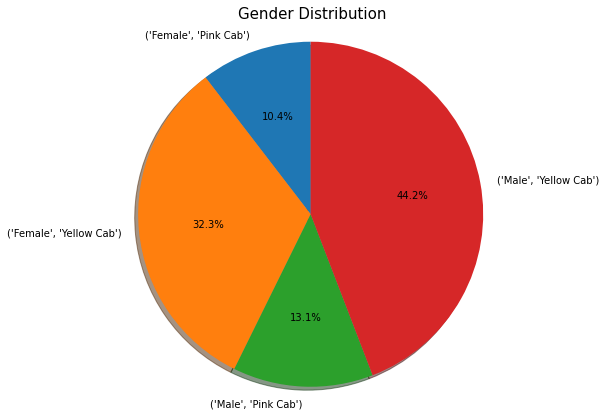

In [9]:
gender = df.groupby(['Gender','Company'])['Gender'].count()
labels = gender.index
value = gender.values 

figp, axp = plt.subplots(figsize=(10,7))
axp.pie(value , labels=labels, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')

plt.title('Gender Distribution', fontsize = 15)
plt.show()

###### Comments:
Males are more likely to use cabs than Females for both companies.




#### 2. Payment of Preference 

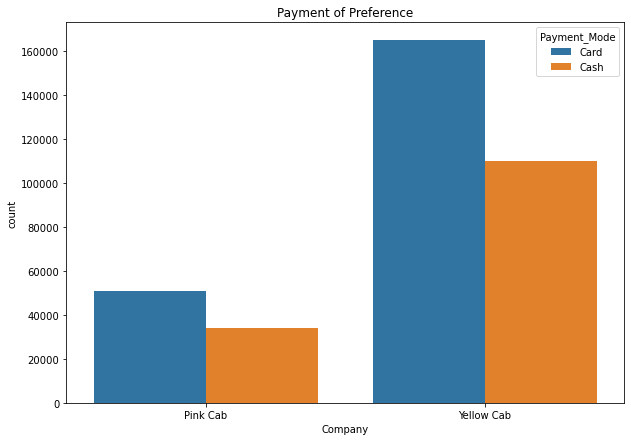

In [10]:
plt.figure(figsize = (10, 7))
ax = sns.countplot(x="Company", hue="Payment_Mode", data=df)
plt.title('Payment of Preference')
plt.show()

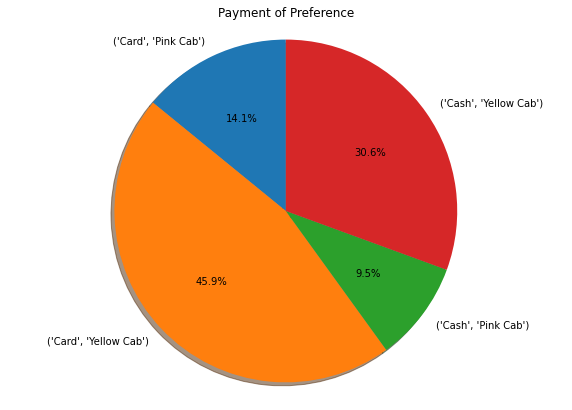

In [11]:
payment = df.groupby(['Payment_Mode','Company'])['Payment_Mode'].count()
labels = payment.index
values = payment.values
figp, axp = plt.subplots(figsize=(10,7))
axp.pie(values , labels=labels, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')

plt.title('Payment of Preference')
plt.show()

###### Comments:
Customers prefer paying by card rather than paying with cash.



#### 3. Gross Profit Margin per Month

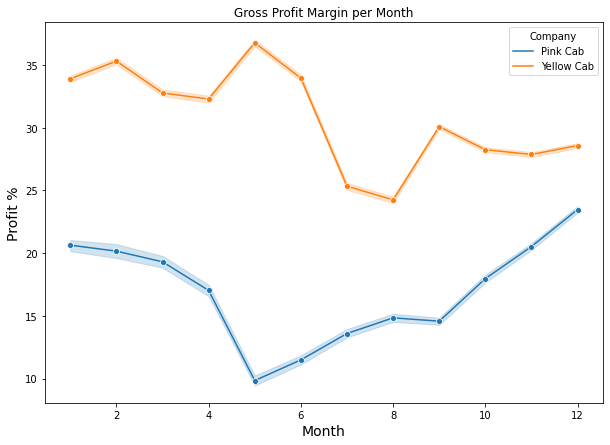

In [12]:
plt.figure(figsize = (10, 7))
sns.lineplot(x='Month', y='Profit %', hue="Company", data=df, marker='o')
plt.xlabel("Month", size=14)
plt.ylabel("Profit %", size=14)
plt.title("Gross Profit Margin per Month")
plt.show()

###### Comments:
Pink Cab's most profitable months are November to January. Yellow Cab's most profitable months are May, February, and January. We also see that Yellow Cab's best month was Pink Cab's worst month.




#### 4. Age Distribution of Customers

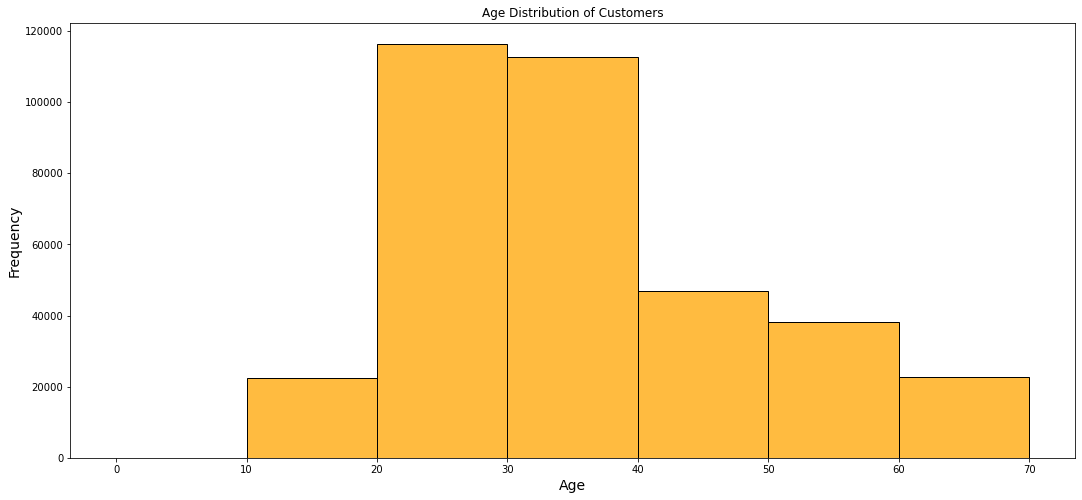

In [16]:
plt.figure(figsize = (18, 8))
sns.histplot( data=df['Age'],binwidth=10,binrange=[0,70],color="orange")
plt.xlabel("Age", size=14)
plt.ylabel("Frequency", size=14)
plt.title("Age Distribution of Customers")
plt.show()

###### Comments:
Most customers that use cab services are between 20 to 40 years old.

#### 5. Users Distribution per Cab Company

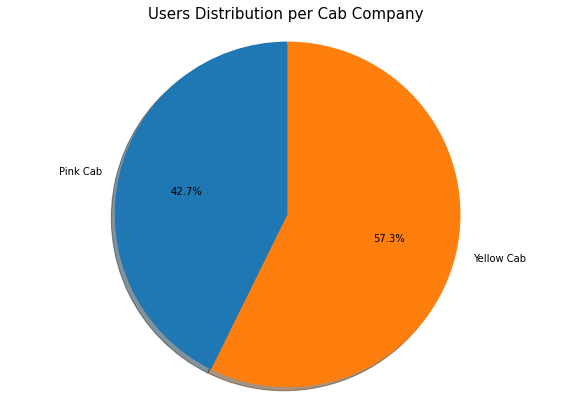

In [17]:
company_groupby = df.groupby('Company').mean()
users= company_groupby['Users']
labels = users.index
value = users.values 

figp, axp = plt.subplots(figsize=(10,7))
axp.pie(value , labels=labels, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')

plt.title('Users Distribution per Cab Company', fontsize = 15)
plt.show()

###### Comments:
Customers use Yellow Cab more than Pink Cab.

#### 6. Customers KM Travelled

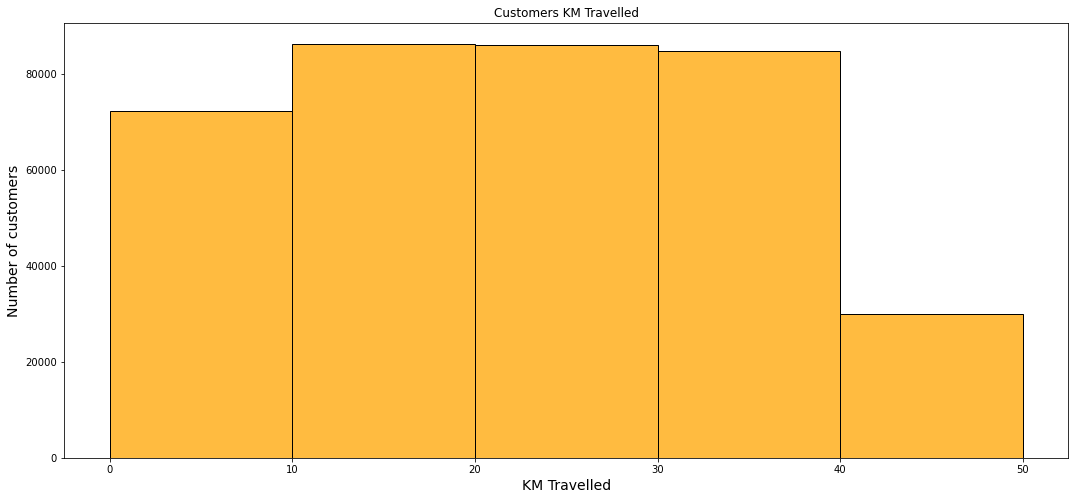

In [18]:
plt.figure(figsize = (18, 8))
sns.histplot( data=df["KM Travelled"],binwidth=10,binrange=[0,50], color="orange")
plt.xlabel("KM Travelled", size=14)
plt.ylabel("Number of customers", size=14)
plt.title("Customers KM Travelled")
plt.show()

###### Comments:
Most customers travel between 10 to 40 KM.

#### 7. Top 10 Cities that use Cab Services

<AxesSubplot:title={'center':'Top 10 Cities that use Cab Services'}, xlabel='City', ylabel='Number of Customers'>

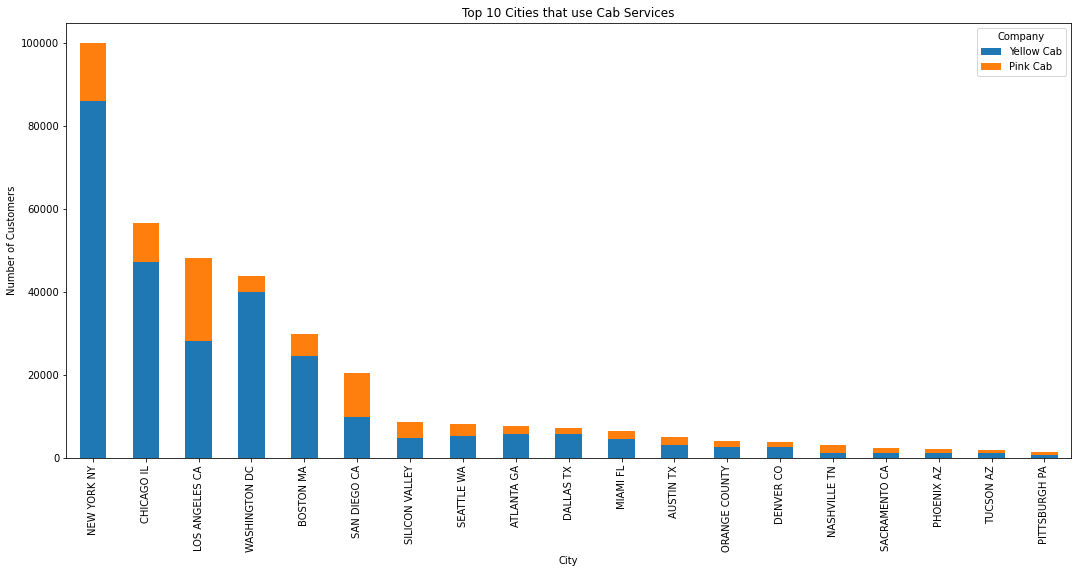

In [19]:
city = df.groupby(['City','Company'])['City'].count().unstack('Company')
city['Total']= city['Pink Cab'] + city['Yellow Cab']
city= city.sort_values('Total',ascending=False)

city[['Yellow Cab','Pink Cab']].plot(kind='bar', stacked=True,xlabel='City',
ylabel='Number of Customers',title='Top 10 Cities that use Cab Services',figsize=[18,8])

In [76]:
city

Company,Pink Cab,Yellow Cab,Total
City,,,
NEW YORK NY,13967,85918,99885
CHICAGO IL,9361,47264,56625
LOS ANGELES CA,19865,28168,48033
WASHINGTON DC,3692,40045,43737
BOSTON MA,5186,24506,29692
SAN DIEGO CA,10672,9816,20488
SILICON VALLEY,3797,4722,8519
SEATTLE WA,2732,5265,7997
ATLANTA GA,1762,5795,7557


###### Comments:
New Yorkers have had the most cab transactions followed by Chicago and Los Angeles residents. All the cities use Yellow Cab more except NASHVILLE TN, SACRAMENTO CA, and PITTSBURGH PA.

#### 8. Percentage of Population who uses Cab Services in Top 10 Cities 

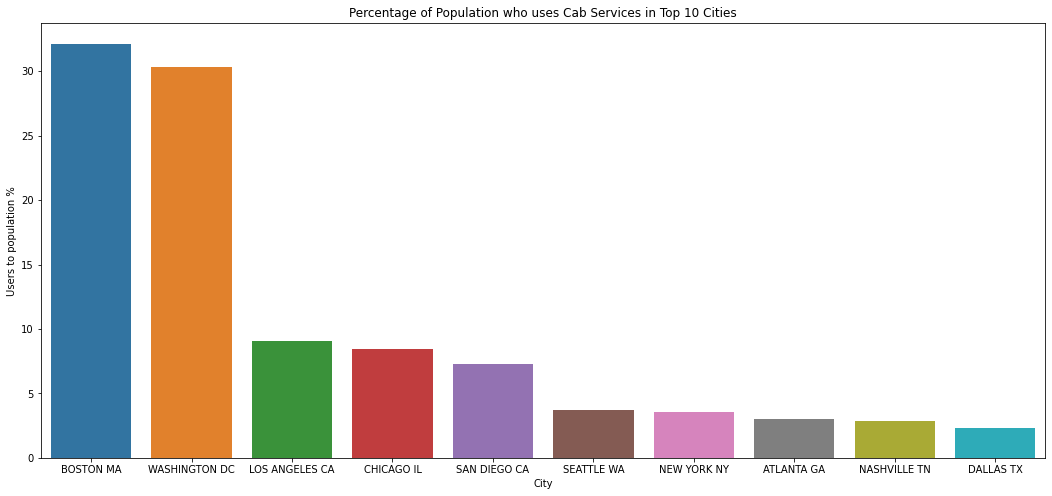

,Users to population %,City
12453,32.14,BOSTON MA
315655,30.32,WASHINGTON DC
109612,9.04,LOS ANGELES CA
42145,8.41,CHICAGO IL
276720,7.30,SAN DIEGO CA
297208,3.73,SEATTLE WA
167109,3.59,NEW YORK NY
0,3.03,ATLANTA GA
164099,2.83,NASHVILLE TN
98770,2.35,DALLAS TX


In [20]:
population=df[['Users to population %','City']].drop_duplicates().sort_values('Users to population %',ascending=False).head(10)
population_all=df[['Users to population %','City']].drop_duplicates().sort_values('Users to population %',ascending=False)
plt.figure(figsize=(18,8))
sns.barplot(x=population['City'], y=population['Users to population %'])
plt.title('Percentage of Population who uses Cab Services in Top 10 Cities')
plt.show()
population_all

###### Comments:
New Yorkers account for most cab use however, only 3.59% of their Population use cabs. Boston and Washington have the most cab users relative to their populations.

#### 9. Customers Monthly Income

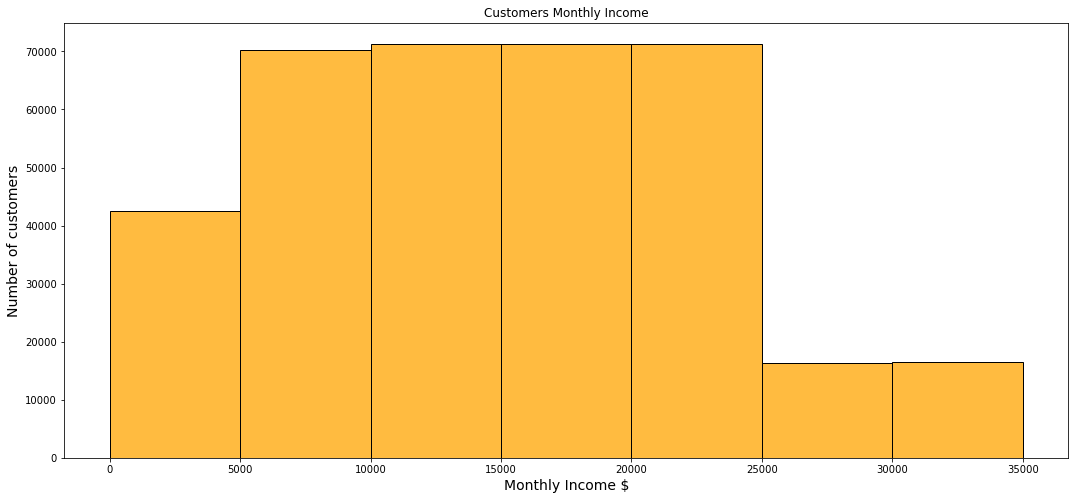

In [21]:
plt.figure(figsize = (18, 8))
sns.histplot( data=df["Income (USD/Month)"],bins=7,binrange=[0,35000],color="orange")
plt.xlabel("Monthly Income $", size=14)
plt.ylabel("Number of customers", size=14)
plt.title("Customers Monthly Income")
plt.show()

###### Comments:
Most customers make between 5000 and 25000 dollars per month.

#### 10. Correlation Matrix

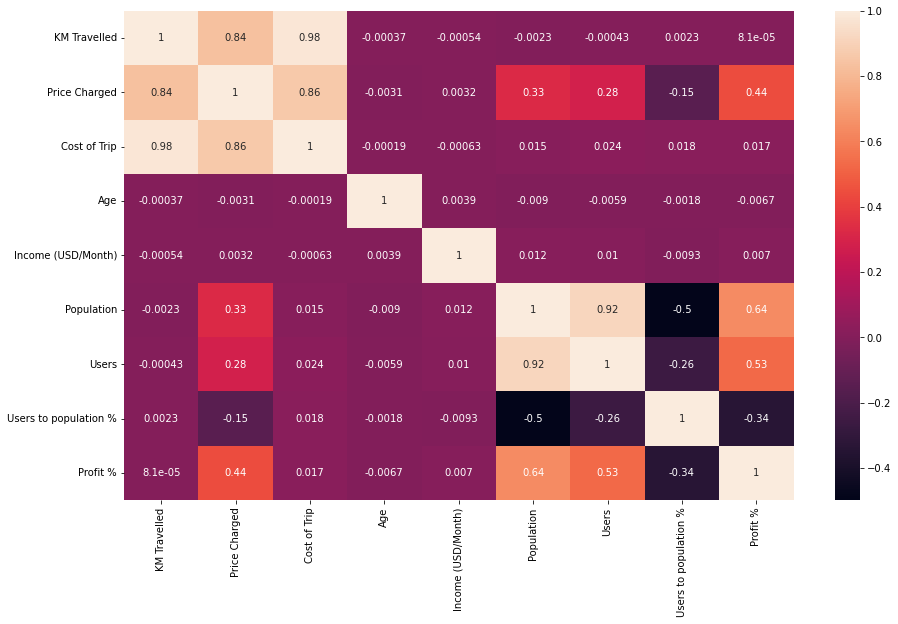

In [156]:
plt.figure(figsize = (15, 9))
corr_matrix = df[['KM Travelled', 'Price Charged', 'Cost of Trip', 'Age', 'Income (USD/Month)', 'Population', 'Users','Users to population %','Profit %']].corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

###### Comments
The heatmap shows that "KM Travelled" is highly correlated with "Cost of Trip" and "Price Charged". Demographic factors such as age or customer income don't have an impact on any of the other attributes.

There is a correlation between "Profit%", "Population" and "Users". 

## Part 4 - Hypothesis Conclusion

#### H0: The age of customers plays a role in profit margin.
#### H1: The age of customers does not play a role in profit margin.

###### Comments:
From figure Part 3 number 10, the age of customers does not play in profit margin. Where 1.0 is perfectly correlated, a score of -0.0067 was attributed to their correlation.
Hence, we reject the Null hypothesis (H1).


#### H0: There is a seasonality in the number of customers using cab services. 
#### H1: There is a no seasonality in the number of customers using cab services.

###### Comments:
From figure Part 3 number 3, Pink Cab's most profitable months are November to January. Yellow Cab's most profitable months are May, February, and January.
Hence, we reject the Null hypothesis (H1).

#### H0: More customers use card payments rather than paying in cash. 
#### H1: More customers use cash payments rather than paying with a card.

###### Comments:
From figure Part 3 number 2, more customers pay with their card rather than paying cash.
Hence, we accept the Null hypothesis (H0).

#### H0: Most customers travel for more than 15 minutes.
#### H1: Most customers travel for less than 15 minutes.

###### Comments:
From figure Part 3 number 6, most customers travel more than 20km.
Hence, we accept the Null hypothesis (H0).

#### H0: There is a gender disparity in the number of cab users. 
#### H1: There is no gender disparity in the number of cab users.

###### Comments:
From figure Part 3 number 1, there is a gender disparity in the number of cab users. Male customers account for 57.3% of all customers.
Hence, we accept the Null hypothesis (H0).

## Part 5 - Final Conclusion & Recommendations

This report contains the Exploratory Data Analysis (EDA) of two cab companies in the US: Pink Cab and Yellow Cab. To create data visualizations for insight, all the datasets were merged and underwent a cleansing process. Throughout the analysis, we looked at various factors that touch both companies such as age, gender, profit, users, etc. In sum, it is fair to conclude Yellow Cab is the more profitable company. With the exception of NASHVILLE TN, SACRAMENTO CA, and PITTSBURGH PA, Yellow Cab is used more in all the other cities. Accounting for 57.3 % of Cab utilization in the United States, and having a significantly higher profit margin, I recommend Yellow Cab.